* **Course:** MScFE 620 Discrete-time Stochastic Processes
* **Professors:** 
    * Dr. Ivan Blanko;
    * Sergio Garcia; 
* **Class:** C21-S1
* Group 2 with members:
    * Juan Antonio Vargas Lopez; juanvarl@hotmail.com
    * Kanittha Setthapitayakul; kanittha.se@hotmail.com
    * Loc Nguyen; vinhloc30796@gmail.com

In [1]:
# Import helpers
from binomial import binomial_tree, binomial_freq
from filtration import filtration_set
# Import stats
import numpy as np
np.set_printoptions(precision=4, suppress=True) # prettify numpy
import pandas as pd
pd.set_option('precision', 4) # prettify pandas
import matplotlib.pyplot as plt

# Question 1) Build a binomial tree for stock price evolution. 

Specifically, set the upper movement of the price (u) to an expression that will depend on the number on your group.

$$u = (1.10 + \frac{Group Number}{100})$$,

Group 1, u = 1.11. Group 2 = 1.12. Group 3 = 1.13, …, Group 50 = 1.60

You can define d = 1/u.

## a) Calculate and show the new Binomial tree for N=6.

In [2]:
# Variables
N = 6  # Number of layers
S0 = 1  # Initial price
group_number = 2  # Group Number 2
u = 1.10 + group_number/100; d = 1/u

tree_6 = binomial_tree(N, S0, u)
stock_prices_6 = tree_6["stock_prices"]
df_stock_price_6 = pd.DataFrame(stock_prices_6)
df_stock_price_6.index.name = 'Time Step'
df_stock_price_6

,0,1,2,3,4,5,6
Time Step,,,,,,,
0,1.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
1,0.8929,1.1200,0.0000,0.0000,0.0000,0.0000,0.0000
2,0.7972,1.0000,1.2544,0.0000,0.0000,0.0000,0.0000
3,0.7118,0.8929,1.1200,1.4049,0.0000,0.0000,0.0000
4,0.6355,0.7972,1.0000,1.2544,1.5735,0.0000,0.0000
5,0.5674,0.7118,0.8929,1.1200,1.4049,1.7623,0.0000
6,0.5066,0.6355,0.7972,1.0000,1.2544,1.5735,1.9738


In [3]:
### b) What are the terminal values of each path? 
df_stock_price_6.iloc[-1]

0    0.5066
1    0.6355
2    0.7972
3    1.0000
4    1.2544
5    1.5735
6    1.9738
Name: 6, dtype: float64

### b) Define the appropriate filtrations for each of these values.

To define the filtration $\mathbb{F}$, we first define a stochastic process $S = \{S_t:t=1,...,T\}$ where:
$$ S_t(\omega) = \omega_n, \omega \in \Omega, n \in \{1,...,2^T\}$$

Define a filtration $\mathbb{F}=\{ \mathcal{F}_t:t=1,...,T \}$ where $\mathcal{F}_T$ is the natural filtration of $S$.
$$ \mathcal{F}_T=\sigma(\{ S_t:t \leq T \}) $$

Specifically, in our binomial model with $T=6$:

* $\mathcal{F}_0 = \{\emptyset, \Omega\}$
* $\mathcal{F}_{1} = \sigma( \{w_{1},...,w_{16}\}, \{w_{17},...,w_{32}\}, \{w_{33},...,w_{48}\}, \{w_{49},...,w_{64} \})$
* $\mathcal{F}_{2} = \sigma( \{w_{1},...,w_{8}\}, \{w_{9},...,w_{16}\}, \{w_{17},...,w_{24}\}, \{w_{25},...,w_{32}\}, \newline 
\{w_{33},...,w_{40}\}, \{w_{41},...,w_{48}\}, \{w_{49},...,w_{56}\}, \{w_{57},...,w_{64}\})$
* $\mathcal{F}_{3} = \sigma( \{w_{1},...,w_{4}\}, \{w_{5},...,w_{8}\}, \{w_{9},...,w_{12}\}, \{w_{13},...,w_{16}\}, \newline 
\{w_{17},...,w_{20}\}, \{w_{21},...,w_{24}\}, \{w_{25},...,w_{28}\}, \{w_{29},...,w_{32}\}, \newline 
\{w_{33},...,w_{36}\}, \{w_{37},...,w_{40}\}, \{w_{41},...,w_{44}\}, \{w_{45},...,w_{48}\}, \newline 
\{w_{49},...,w_{52}\}, \{w_{53},...,w_{56}\}, \{w_{57},...,w_{60}\}, \{w_{61},...,w_{64}\})$
* $\mathcal{F}_{4} = \sigma( \{w_{1},w_{2}\}, \{w_{3},w_{4}\}, \{w_{5},w_{6}\}, \{w_{7},w_{8}\}, \{w_{9},w_{10}\}, \{w_{11},w_{12}\}, \newline 
\{w_{13},w_{14}\}, \{w_{15},w_{16}\}, \{w_{17},w_{18}\}, \{w_{19},w_{20}\}, \{w_{21},w_{22}\}, \{w_{23},w_{24}\}, \newline 
\{w_{25},w_{26}\}, \{w_{27},w_{28}\}, \{w_{29},w_{30}\}, \{w_{31},w_{32}\}, \{w_{33},w_{34}\}, \{w_{35},w_{36}\}, \newline 
\{w_{37},w_{38}\}, \{w_{39},w_{40}\}, \{w_{41},w_{42}\}, \{w_{43},w_{44}\}, \{w_{45},w_{46}\}, \{w_{47},w_{48}\}, \newline 
\{w_{49},w_{50}\}, \{w_{51},w_{52}\}, \{w_{53},w_{54}\}, \{w_{55},w_{56}\}, \{w_{57},w_{58}\}, \{w_{59},w_{60}\}, \newline 
\{w_{61},w_{62}\}, \{w_{63},w_{64}\})$
* $\mathcal{F}_{5} = \mathcal{F} = 2^{\Omega}$

In [4]:
### b) Define the appropriate filtrations for each of these values.
print("Sampling first 3 filtrations:\n")
S0 = 1
u = 1.12
d = 1/u
N = 3
for i in range(N):
    print(f"\tF{i} = {filtration_set(S0,u,d,N,i)}\n")

Sampling first 3 filtrations:

	F0 = [(), ([1.4049280000000004, 1.12, 1.12, 0.8928571428571428, 1.12, 0.8928571428571428, 0.8928571428571429, 0.711780247813411],)]

	F1 = [(), ([1.4049280000000004, 1.12, 1.12, 0.8928571428571428],), ([1.12, 0.8928571428571428, 0.8928571428571429, 0.711780247813411],), ([1.4049280000000004, 1.12, 1.12, 0.8928571428571428], [1.12, 0.8928571428571428, 0.8928571428571429, 0.711780247813411])]

	F2 = [(), ([1.4049280000000004, 1.12],), ([1.12, 0.8928571428571428],), ([1.12, 0.8928571428571428],), ([0.8928571428571429, 0.711780247813411],), ([1.4049280000000004, 1.12], [1.12, 0.8928571428571428]), ([1.4049280000000004, 1.12], [1.12, 0.8928571428571428]), ([1.4049280000000004, 1.12], [0.8928571428571429, 0.711780247813411]), ([1.12, 0.8928571428571428], [1.12, 0.8928571428571428]), ([1.12, 0.8928571428571428], [0.8928571428571429, 0.711780247813411]), ([1.12, 0.8928571428571428], [0.8928571428571429, 0.711780247813411]), ([1.4049280000000004, 1.12], [1.12, 0.

# Question 2) Finally, recalculate the tree for N=4,000.

## a) Plot the terminal prices produced by the model

In [5]:
# Variables
N = 4000  # number of layers
# Recreate the tree
tree_4000 = binomial_tree(N, S0, u)
stock_prices_4000 = tree_4000["stock_prices"]
# Mangling
df_P_4000 = pd.DataFrame(stock_prices_4000)
P_4000 = df_P_4000.iloc[-1:].to_numpy()

In [6]:
# Calculate the frequency
freq_arr = binomial_freq(N, relative=True)

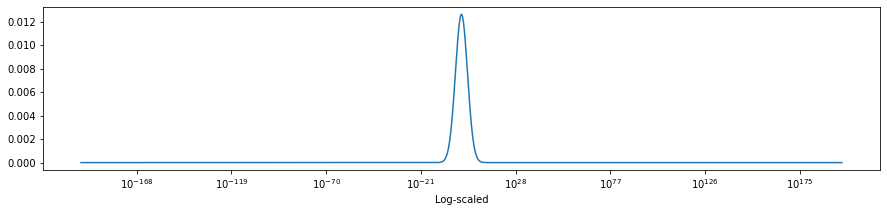

In [7]:
# Plot
fig, ax = plt.subplots(
    figsize=(15,3)
)
ax.plot(
    P_4000[0],
    freq_arr
)
ax.set_xscale('log')
ax.set_xlabel('Log-scaled')
plt.show()

## b) Can you identify what type of statistical distribution do these prices resemble to?

After a log-rescale of the x-axis, the post-rescale prices resemble a normal distribution. 
Hence, the prices themselves resemble a log-normal distribution.

## c) Which statistical distribution would Returns follow, that  is, using a log-function from previous prices? Indicate the appropriate Probability Density Function for it.


### Case 1: if we defined $Return = \ln(\frac{Price_t}{Price_{t-1}})$

In this case, then $Returns$ are either (roughly) $u-1 \approx .12$ or $1-d \approx -.12$.

Its distribution is:

$$ p_{Returns}(u-1) = p_{Returns}(.12) = \mathbb{P}(Returns = .12) = p $$
$$ p_{Returns}(1-d) = p_{Returns}(-.12) = \mathbb{P}(Returns = -.12) = 1-p $$

where p is the probability of an up-movement.

### Case 2: if we defined $Return = \ln(\frac{Price_t}{Price_{0}})$

then its distribution is the normal distribution,

and its PDF is, accordingly:

$$ p_{Returns}(x) = \varphi(x) = \frac{e^{-\frac{1}{2} x^2}}{\sqrt{2\pi}} $$

# Question 3)

## a) How many fundamental securities are there in the market?

There are many fundamental securities in the markets:

* Cash & Cash equivalents
* Accounts Receivable / Notes Receivables
* Fixed Deposits
* Equity Shares
* Debentures/ Bonds
* Preference Shares
* Mutual Funds
* Interests in subsidiaries, associates and joint ventures
* Insurance contracts
* Rights and Obligations under leases
* Share-Based Payments

## b) At any given node, how many states of the world are there in the binomial tree?

Each node represents 2 states of the world:

* The state where the price goes up
* The state where the price goes down

## c) Define market completeness using parts a and b

A complete market is one where contracts can be made to gamble on all states of the world using the existing instruments

## d) Suppose the underlying stock price jumped. By jumps, we mean that it moves by a factor larger than u (or smaller than d) from 1 node to the next. Would that market still be complete? Why or why not?

That market is still complete.

* If the price has increased by a factor larger than u, then it has also increased (at least) u. That state of the world is still represented in the model.
* If the price has decreased by a factor larger than d, then it has also decreased (at least) d. That state of the world is still represented in the model.

# References

* [Complete Market - Defintions.net](https://www.definitions.net/definition/complete+market)
* Crow, Edwin L. Lognormal Distributions: Theory and Applications (2018). CRC Press.ISBN.URL:https://books.google.co.uk/books?id=glMPEAAAQBAJ
* John Van Der Hoek, Robert J. Elliott (2006).Binomial Models in Finance. Springer